In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
bank_dataset = pd.read_csv('./exp4.csv')

print(bank_dataset.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  y  \
0            1       261         1    999         0         1  0   
1            1       149         1    999         0         1  0   
2            1       226         1    999         0         1  0   
3            1       151         1    999         0         1  0   
4            1       307         1    999         0         1  0   

   age_normalized  
0        1.690550  
1        1.794158  
2       -0.278011  
3        0.032815  
4        1.690550  


<Axes: xlabel='y', ylabel='count'>

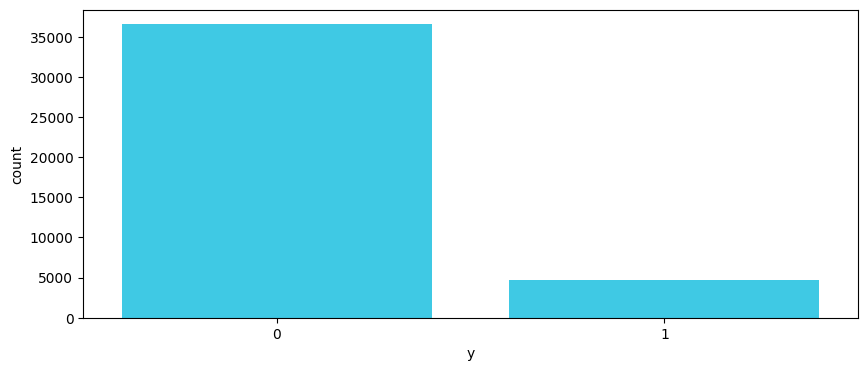

In [3]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("cool")
 
sns.set_palette(color_palette) 
sns.countplot(x = "y", data = bank_dataset) 

In [4]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = bank_dataset[bank_dataset['y'] == 0]
minority_class = bank_dataset[bank_dataset['y'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_dataset = pd.concat([majority_class, minority_upsampled])

# Display class counts
print(balanced_dataset['y'].value_counts())

# Now you can use balanced_dataset for your analysis


y
0    36548
1    36548
Name: count, dtype: int64


<Axes: xlabel='y', ylabel='count'>

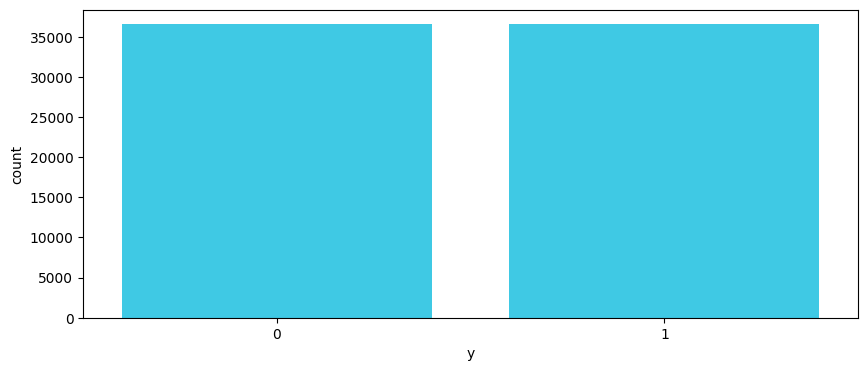

In [5]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("cool")
 
sns.set_palette(color_palette) 
sns.countplot(x = "y", data = balanced_dataset) 

In [6]:
balanced_dataset.to_csv('exp5.csv', index=False)